<img src="https://github.com/CorndelDataAnalyticsDiploma/workshop/blob/master/Corndel%20Digital%20Logo%20Centre.png?raw=true" alt="Corndel" width ="301.5" align="left">

# Predictive Modelling

In this notebook we will build a Linear Predictive Model





### Simple Linear Regression

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


import math
import pandas as pd

import seaborn as sns

import os

# Multiple Linear Regression
#### We will start with Simple Linear Regression and gradually build in more variables


Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

Number of Instances: 442

Number of Attributes: First 10 columns are numeric predictive values

Target: Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
- Age
- Sex
- Body mass index
- Average blood pressure
- S1
- S2
- S3
- S4
- S5
- S6

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

In [76]:
# Load the diabetes dataset
df_dia = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt",sep="\t")
df_dia.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

<div class="alert alert-block alert-warning">

#### Any issues with this data?
    
    --Encoding of Sex is an issue
    
    -- We will address later but discuss now

# Discussion on encoding

Categorical encoding, ordinal, one-hot

🤖`*"can i encode male and female as 1 and 2 for linear regression model?"*`

LLM will warn of ths issues with this and offer solutions

### Step 1, EDA and Data Viz


<div class="alert alert-block alert-warning">

#### Examine the data, does it look like there is a linear relationship?
#### Is a Linear model suitable?
#### Do you see any outliers?
#### What options do you have to deal with outliers?

In [88]:
df_dia.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

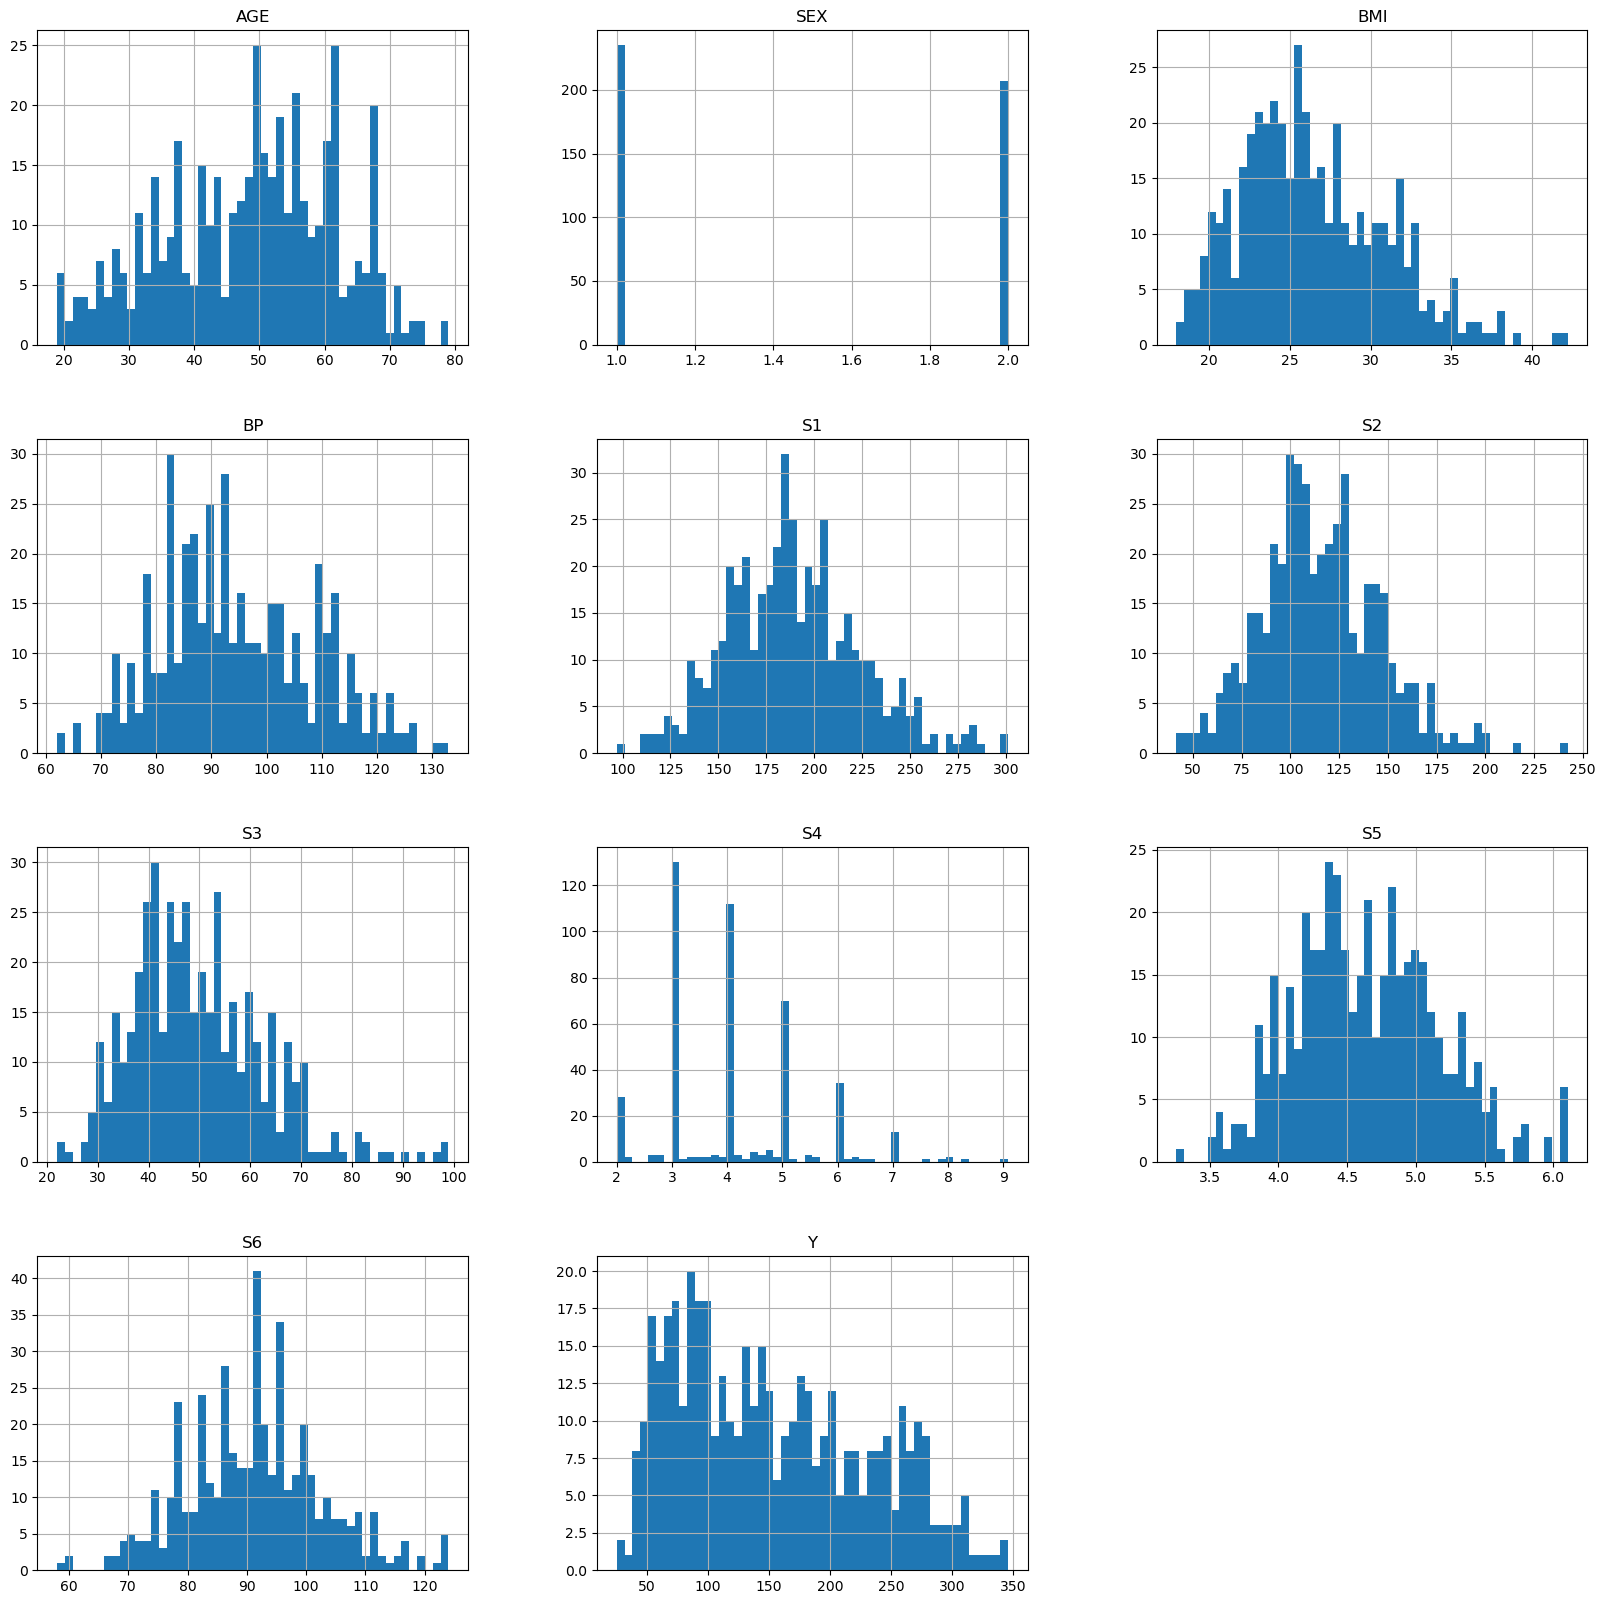

In [82]:
df_dia.hist(figsize = (20,20),bins = 50);


# Obervations
You will notice that BMI, S3 and target variable are all skewed.\
Transformations should be applied to these columns.\
This is covered in the extension material.

# Train, Test Split

We must divide the data into:
 - a Training set and 
  - a Test set 
  - with a 70:30 split
  
We will build the model using the training data and asses how well our model performs on the test data.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

To test asses how well our model performs we will use both:
 - Root Mean Squared Error (RMSE) and 
  - Mean Absolute Percentage Error (MAPE). 
  
 We will look at these in detail later

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Pairplot

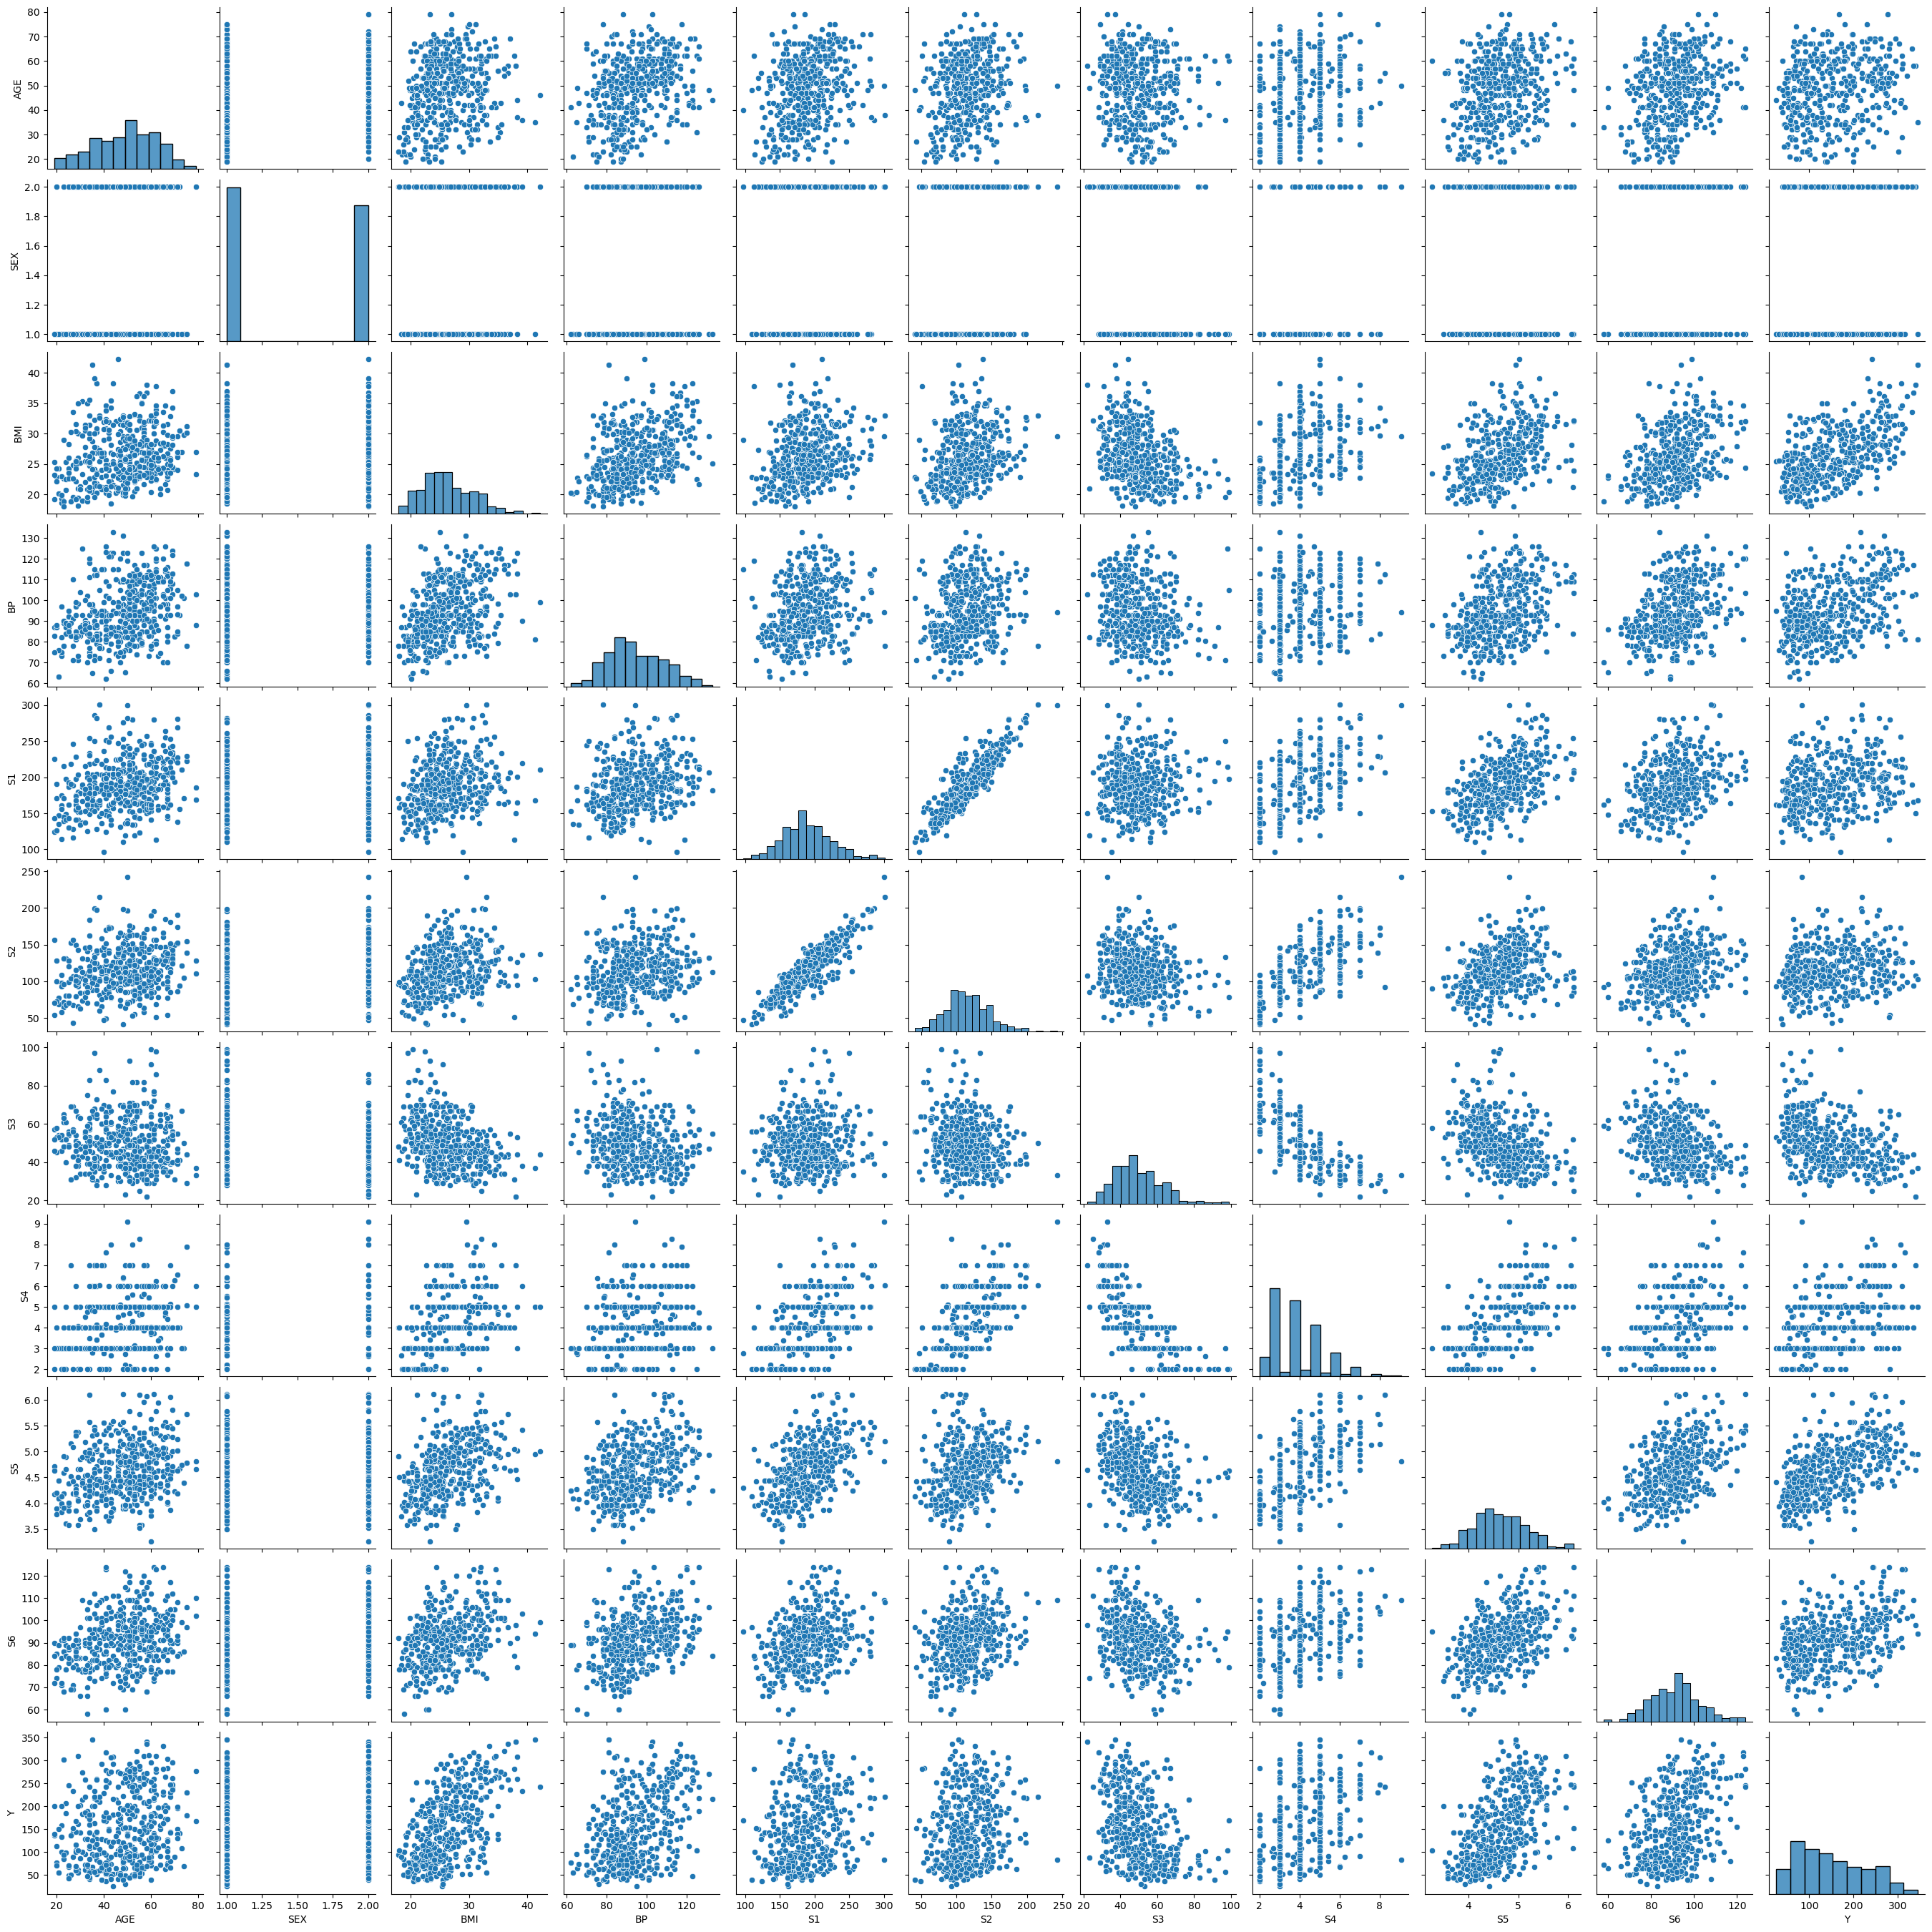

In [81]:
sns.pairplot(df_dia);


# Observations
We can see S1 and S2 are highly correlated.\
This woul dbe an issue for Regression analysis, but does not concern us for predictive modelling

# Simple Linear Regression

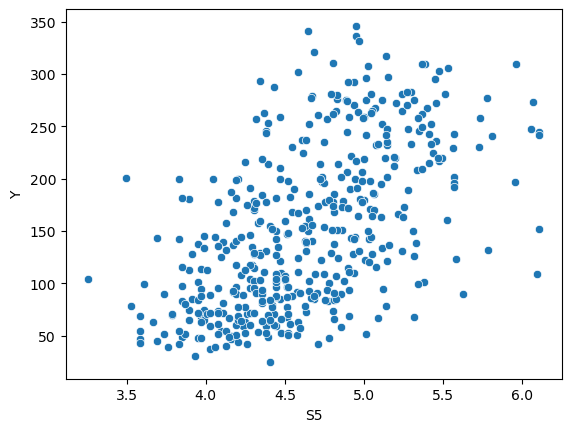

In [83]:
sns.scatterplot(data=df_dia, x="S5", y="Y");


In [84]:
X = sm.add_constant(df_dia[['S5']])
y = df_dia['Y']


model = sm.OLS(y,X).fit()

model.predict(test)
score(test, actual) -> RMSE and again for MAPE

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 05 May 2025   Prob (F-statistic):           8.83e-39
Time:                        19:35:55   Log-Likelihood:                -2461.9
No. Observations:                 442   AIC:                             4928.
Df Residuals:                     440   BIC:                             4936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -235.4774     27.093     -8.692      0.000    -288.725    -182.230
S5            83.5114      5.801     14.397      0.000      72.111      94.912
==============================================================================
Omnibus:                       11.707   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.034
Skew:                           0.384   Prob(JB):                      0.00244
Kurtosis:                       2.747   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

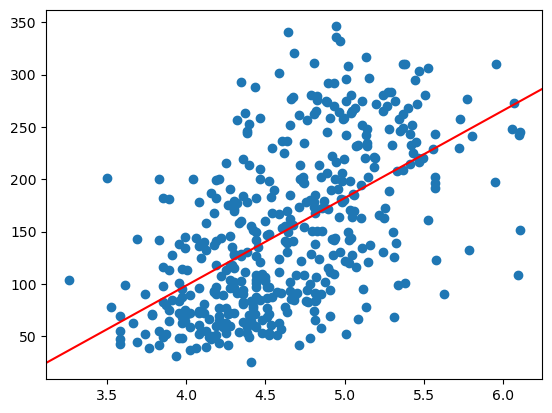

In [85]:

fig, ax = plt.subplots()

# Scatter plot
ax.scatter(df_dia['S5'], df_dia['Y'])

# Regression line on same axes
sm.graphics.abline_plot(model_results=model, ax=ax, color='red')

# Set limits
# ax.set(ylim=(2,11), xlim=(50,85))

plt.show()

# Multiple Linear Regression

We can no longer visualise the inouts against the output.\
e must rely on metrics to build our model correctly

In [20]:
df.describe().round(2)

AGE     SEX     BMI      BP      S1      S2      S3      S4      S5  \
count  442.00  442.00  442.00  442.00  442.00  442.00  442.00  442.00  442.00   
mean    48.52    1.47   26.38   94.65  189.14  115.44   49.79    4.07    4.64   
std     13.11    0.50    4.42   13.83   34.61   30.41   12.93    1.29    0.52   
min     19.00    1.00   18.00   62.00   97.00   41.60   22.00    2.00    3.26   
25%     38.25    1.00   23.20   84.00  164.25   96.05   40.25    3.00    4.28   
50%     50.00    1.00   25.70   93.00  186.00  113.00   48.00    4.00    4.62   
75%     59.00    2.00   29.28  105.00  209.75  134.50   57.75    5.00    5.00   
max     79.00    2.00   42.20  133.00  301.00  242.40   99.00    9.09    6.11   

           S6       Y  
count  442.00  442.00  
mean    91.26  152.13  
std     11.50   77.09  
min     58.00   25.00  
25%     83.25   87.00  
50%     91.00  140.50  
75%     98.00  211.50  
max    124.00  346.00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [6]:
df.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

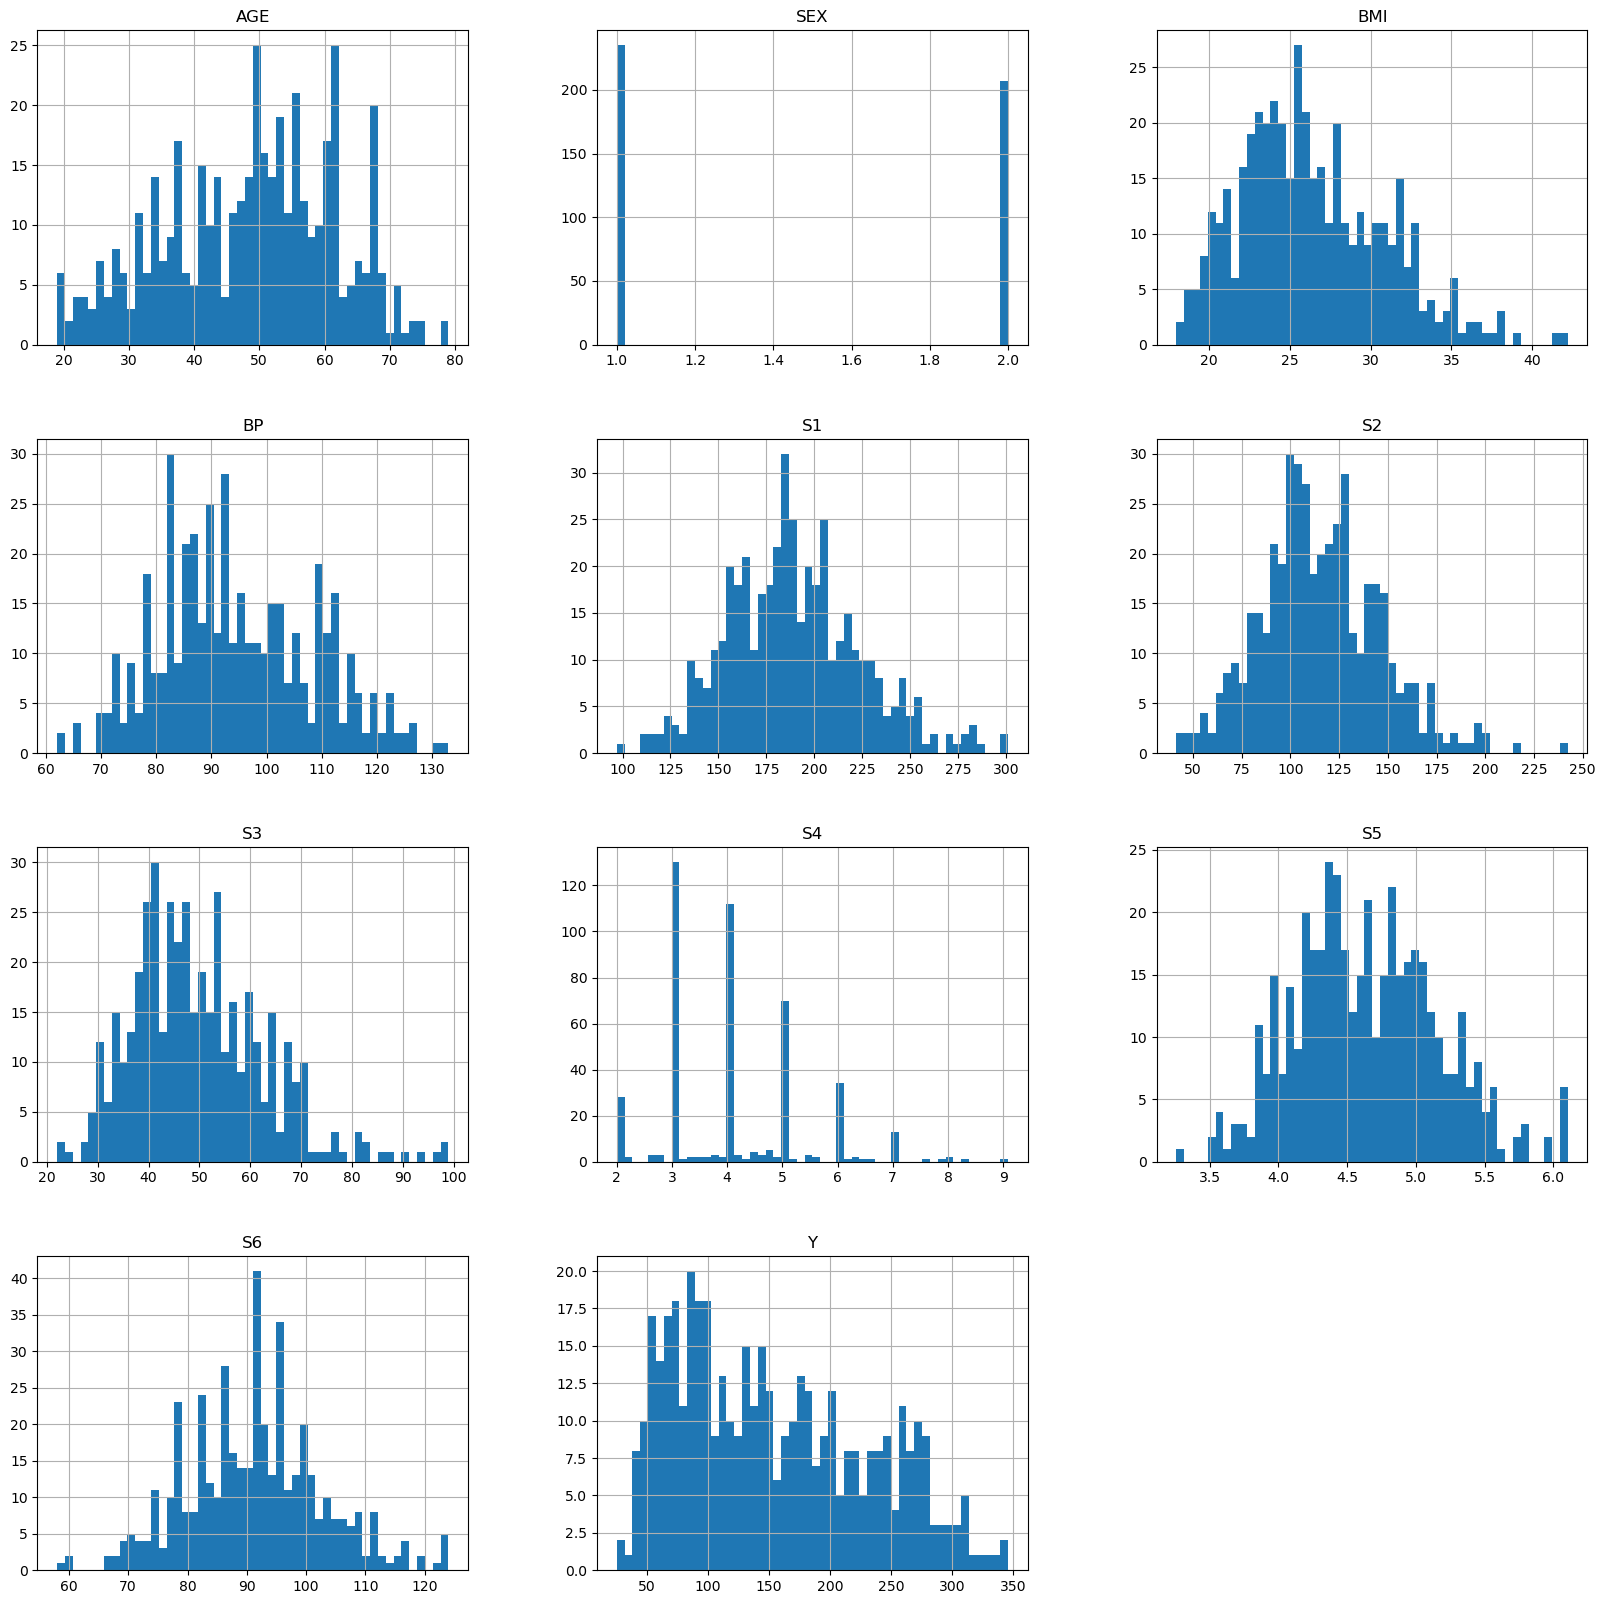

In [10]:

df.hist(figsize = (20,20),bins = 50);


In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 20))  # Width=12, Height=10 (adjust as needed)

sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
(df.drop('column_to_exclude', axis=1))

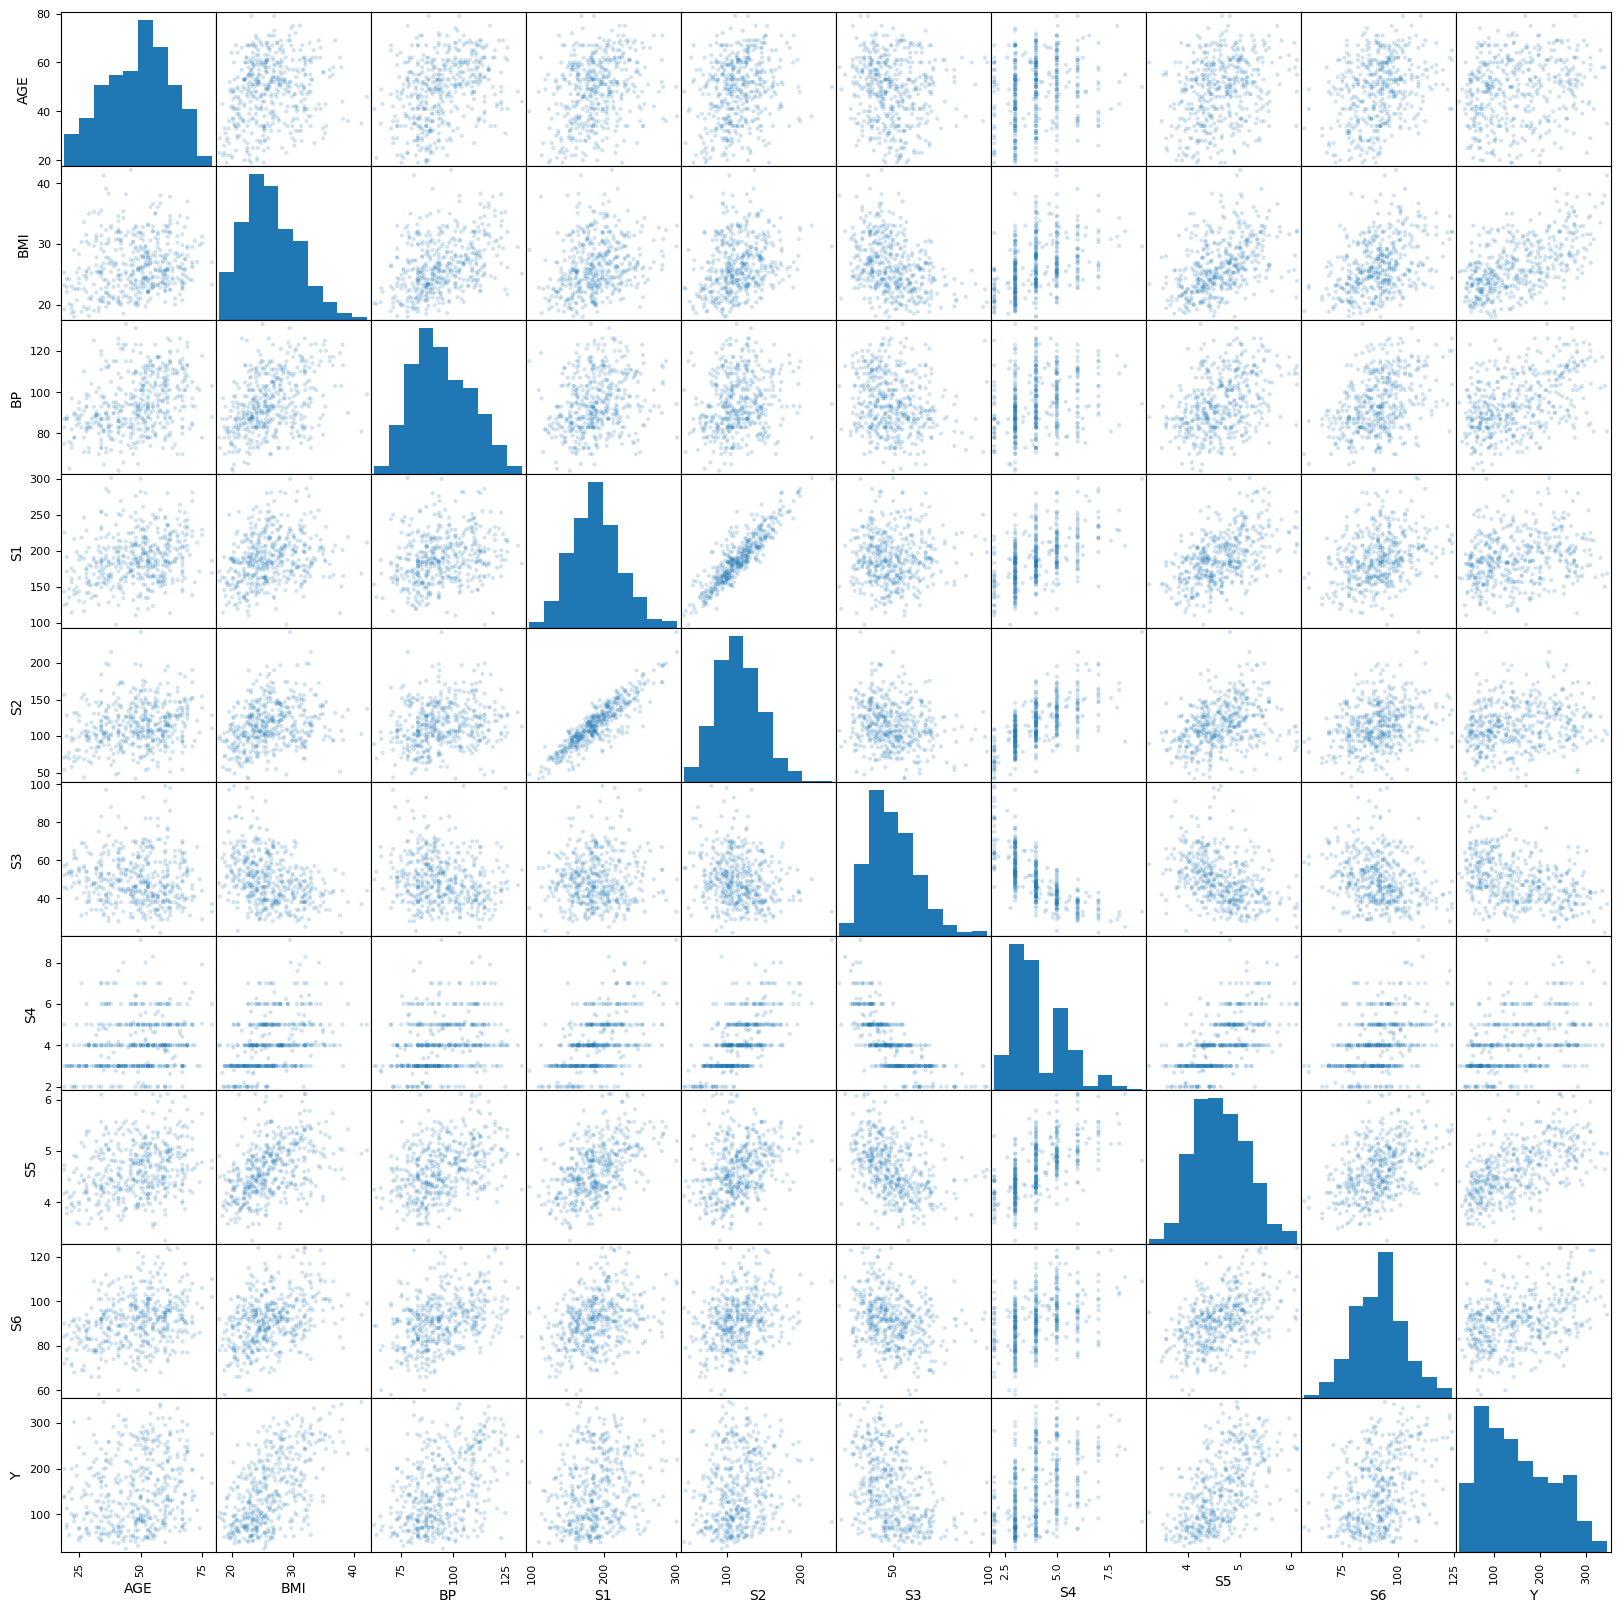

In [15]:
pd.plotting.scatter_matrix((df.drop('SEX', axis=1)), alpha=0.2,figsize = (20,20));
